In [1]:
import numpy as np
import matplotlib.pyplot as plt
from local_framework import local_framework
from population_framework import population_framework

In [2]:
# 2D random stimulus
# simulation length
NT = 3
# dt
dt_stim = 0.1/1000 
# time vector
time = np.arange(dt_stim, NT + dt_stim, dt_stim) 
# num time bins
nt = len(time) 

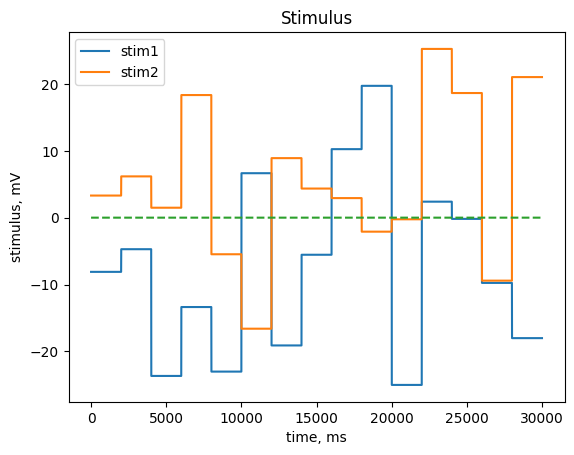

In [49]:
# plot stimulus
plt.plot(stim[0], label='stim1')
plt.plot(stim[1], label='stim2')

plt.plot(np.zeros(len(time)), '--')
plt.ylabel("stimulus, mV")
plt.xlabel("time, ms")
plt.title("Stimulus")
plt.legend()
plt.show()

In [6]:
# parameters for the simulation

# parameters for stimulation 1, 1D integrator
params_1 = {}
params_1["N"] = 400
params_1["tau_d"] = 1  
params_1["mu"] = 0  
params_1["time_delay"] = 0  
params_1["w_sig"] = 2  
# for local framework
params_1["F_max"] = 1 
params_1["alpha"] = 80  
params_1["F_min"] = 0  
# for population framework
params_1["beta"] = 50 
params_1["A"] = np.zeros((1,1))
params_1["w_mean"] = 0.2 * np.ones((1, params_1["A"].shape[0]))

# parameters for simulation 2, 2D harmonic oscillator
params_2 = {}
params_2["N"] = 400
params_2["tau_d"] = 1  
params_2["mu"] = 0  
params_2["time_delay"] = 0  
params_2["w_sig"] = 2  
# for local framework
params_2["F_max"] = 1 
params_2["alpha"] = 80  
params_2["F_min"] = 0  
# for population framework
params_2["beta"] = 50 
params_2["A"] = np.linalg.inv(np.array([[-0.01, 0.1], [-0.1, -0.01]]))
params_2["w_mean"] = 0.2 * np.ones((1, params_2["A"].shape[0]))

print(params_1)
print(params_2)

{'N': 400, 'tau_d': 1, 'mu': 0, 'time_delay': 0, 'w_sig': 2, 'F_max': 1, 'alpha': 80, 'F_min': 0, 'beta': 50, 'A': array([[0.]]), 'w_mean': array([[0.2]])}
{'N': 400, 'tau_d': 1, 'mu': 0, 'time_delay': 0, 'w_sig': 2, 'F_max': 1, 'alpha': 80, 'F_min': 0, 'beta': 50, 'A': array([[-0.99009901, -9.9009901 ],
       [ 9.9009901 , -0.99009901]]), 'w_mean': array([[0.2, 0.2]])}


In [7]:
a = np.ones((200, 1))
c = a > np.zeros((200,1))
b = np.concatenate((a,a), axis=0)
b.shape
c.shape
g = np.random.rand(int(400/2), 1) > a
g.shape
net_spikes = a.astype(int) - c.astype(int)
net_spikes.shape


(200, 1)

In [31]:
N=400
n_ceil = int(np.ceil(N / 2))
n_floor = int(np.floor(N / 2))

# Generate the sign pattern
sign_pattern = np.append(-np.ones(n_ceil), np.ones(n_floor))
sign_pattern2 = np.concatenate((-np.ones(n_ceil), np.ones(n_floor)))
print(sign_pattern.shape)
print(sign_pattern2.shape)
# Calculate the mean of weights
ww_mean = np.dot(params_2["w_mean"].T, sign_pattern.reshape(1,-1))
ww_mean.shape
stim.shape

(400,)
(400,)


(2, 30000)

In [90]:
ss_l_1, xh_l_1, xx_l_1 = local_framework(stim = stim[1:, :], dt = dt_stim, params = params_1)
ss_p_1, xh_p_1, xx_p_1 = population_framework(stim = stim[1:, :], dt = dt_stim, params = params_1)

ss_l_2, xh_l_2, xx_l_2 = local_framework(stim = stim, dt = dt_stim, params = params_2)
ss_p_2, xh_p_2, xx_p_2 = population_framework(stim = stim, dt = dt_stim, params = params_2)

In [91]:
def return_spiked_neurons_indices(ss, N):
    # inhibitory spikes
    ind_inh = np.argwhere(ss[1:int(N/2) + 1,:])
    i_inh = ind_inh[:,0] 
    j_inh = ind_inh[:,1]

    # excitatory spikes
    ind_exc = np.argwhere(ss[int(N/2):N,:])
    i_exc = ind_exc[:,0]
    j_exc = ind_exc[:,1]

    i_exc += 200 # to have a nice layout of the plot, otherwise excitatory spikes will be mixed with inhibitory ones

    return i_inh, j_inh, i_exc, j_exc 

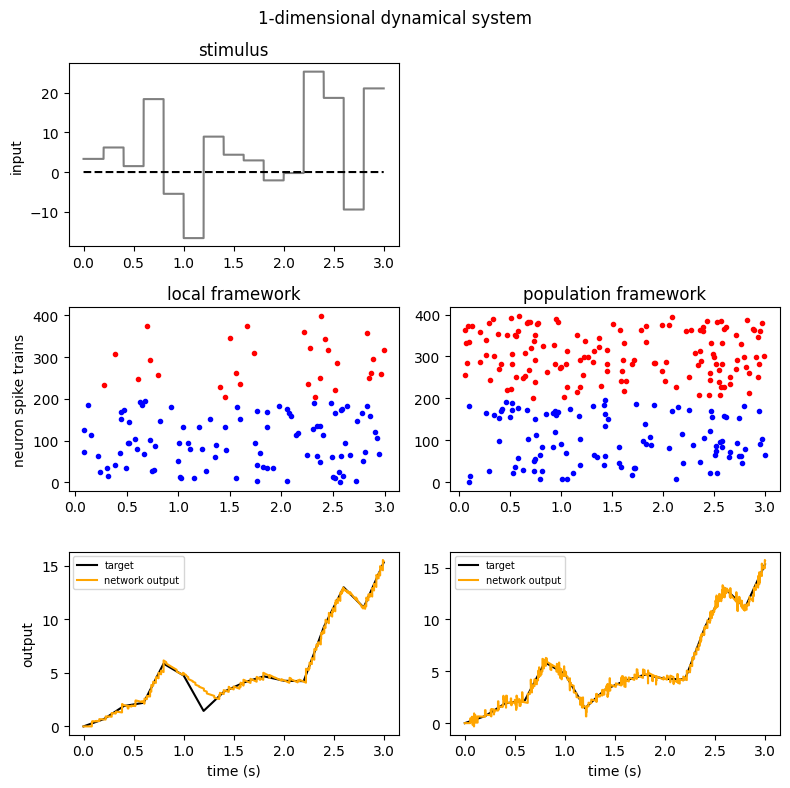

In [100]:
fig, axes = plt.subplots(3, 2, figsize=(8, 8))
fig.delaxes(axes[0, 1])

axes[0, 0].plot(time, stim[1], c = "grey")
axes[0, 0].plot(time, np.zeros(len(time)), "--", c = "black")
axes[0, 0].set_title(r"stimulus")
axes[0, 0].set_ylabel("input")

# Raster plots of inh/exc spikes
i_inh_1, j_inh_1, i_exc_1, j_exc_1 = return_spiked_neurons_indices(ss_l_1, params_1["N"])
axes[1, 0].plot(j_inh_1 * dt_stim, i_inh_1, ".", c = "blue")
axes[1, 0].plot(j_exc_1 * dt_stim, i_exc_1, ".", c = "red")
axes[1, 0].set_title(r"local framework")
axes[1, 0].set_ylabel("neuron spike trains")

i_inh_2, j_inh_2, i_exc_2, j_exc_2 = return_spiked_neurons_indices(ss_p_1, params_1["N"])
axes[1, 1].plot(j_inh_2 * dt_stim, i_inh_2, ".", c = "blue")
axes[1, 1].plot(j_exc_2 * dt_stim, i_exc_2, ".", c = "red")
axes[1, 1].set_title(r"population framework")


# Plots of the target dynamics and our approximation
# axes[1, 0].plot(time, np.zeros(len(time)), "--", c = "black")
axes[2, 0].plot(time, xx_l_1.flatten(), c = "black", label = "target")
axes[2, 0].plot(time, xh_l_1.flatten(), "-", c = "orange", label = "network output")
axes[2, 0].legend(fontsize=7)
axes[2, 0].set_xlabel("time (s)")
axes[2, 0].set_ylabel("output")

# axes[1, 1].plot(time, np.zeros(len(time)), "--", c = "black")
axes[2, 1].plot(time, xx_p_1.flatten(), c = "black", label = "target")
axes[2, 1].plot(time, xh_p_1.flatten(), "-", c = "orange", label = "network output")
axes[2, 1].legend(fontsize=7)
axes[2, 1].set_xlabel("time (s)")




plt.suptitle("1-dimensional dynamical system")
plt.tight_layout()
plt.show()

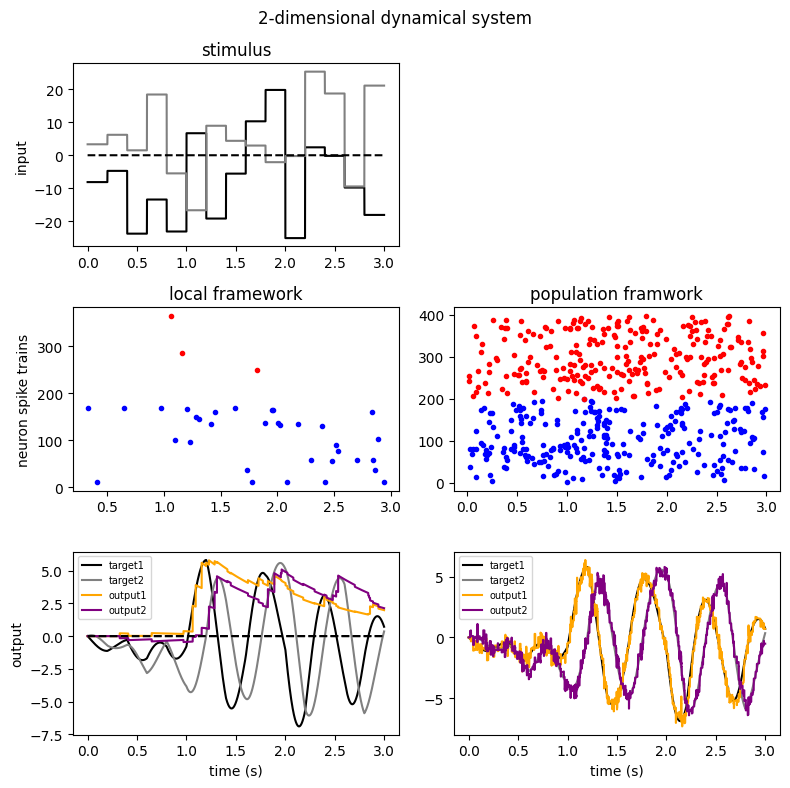

In [101]:
fig, axes = plt.subplots(3, 2, figsize=(8, 8))
fig.delaxes(axes[0, 1])


axes[0, 0].plot(time, stim[0], c = "black")
axes[0, 0].plot(time, stim[1], c = "grey")
axes[0, 0].plot(time, np.zeros(len(time)), "--", c = "black")
axes[0, 0].set_title(r"stimulus")
axes[0, 0].set_ylabel("input")


i_inh_3, j_inh_3, i_exc_3, j_exc_3 = return_spiked_neurons_indices(ss_l_2, params_2["N"])
axes[1, 0].plot(j_inh_3 * dt_stim, i_inh_3, ".", c = "blue")
axes[1, 0].plot(j_exc_3 * dt_stim, i_exc_3, ".", c = "red")
axes[1, 0].set_title(r"local framework")
axes[1, 0].set_ylabel("neuron spike trains")

i_inh_4, j_inh_4, i_exc_4, j_exc_4 = return_spiked_neurons_indices(ss_p_2, params_2["N"])
axes[1, 1].plot(j_inh_4 * dt_stim, i_inh_4, ".", c = "blue")
axes[1, 1].plot(j_exc_4 * dt_stim, i_exc_4, ".", c = "red")
axes[1, 1].set_title(r"population framwork")

axes[2, 0].plot(time, np.zeros(len(time)), "--", c = "black")
axes[2, 0].plot(time, xx_l_2[0], c = "black", label = "target1")
axes[2, 0].plot(time, xx_l_2[1], c = "grey", label = "target2")
axes[2, 0].plot(time, xh_l_2[0], "-", c = "orange", label = "output1")
axes[2, 0].plot(time, xh_l_2[1], "-", c = "purple", label = "output2")
axes[2, 0].set_xlabel("time (s)")
axes[2, 0].set_ylabel("output")
axes[2, 0].legend(fontsize=7)

axes[2, 0].plot(time, np.zeros(len(time)), "--", c = "black")
axes[2, 1].plot(time, xx_p_2[0], c = "black", label = "target1")
axes[2, 1].plot(time, xx_p_2[1], c = "grey", label = "target2")
axes[2, 1].plot(time, xh_p_2[0], "-", c = "orange", label = "output1")
axes[2, 1].plot(time, xh_p_2[1], "-", c = "purple", label = "output2")
axes[2, 1].set_xlabel("time (s)")
axes[2, 1].legend(fontsize=7)


plt.suptitle("2-dimensional dynamical system")
plt.tight_layout()
plt.show()